In [ ]:
#Limpeza e Análise de cnpj (Receita)

In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts
import matplotlib.pyplot as plt

In [4]:
#Importar dados
df = pd.read_csv("cnpj.EMPRECSV", sep=';', names=["CNPJ_BASICO", "RAZAO_SOCIAL/NOME_EMPRESARIAL", "NATUREZA_JURIDICA", "QUALIFICACAO_DO_RESPONSAVEL", "CAPITAL_SOCIAL_DA_EMPRESA", "PORTE_DA_EMPRESA", "ENTE_FEDERATIVO_RESPONSAVEL"], encoding='latin-1')
#Visualizar
df.head()

,CNPJ_BASICO,RAZAO_SOCIAL/NOME_EMPRESARIAL,NATUREZA_JURIDICA,QUALIFICACAO_DO_RESPONSAVEL,CAPITAL_SOCIAL_DA_EMPRESA,PORTE_DA_EMPRESA,ENTE_FEDERATIVO_RESPONSAVEL
0,41273596,RODRIGO JOSE FERREIRA LOPES 05010247941,2135,50,"10000,00",1.0,NaN
1,41273597,PACHARRUS QUEIROZ DA COSTA E SILVA 03618384335,2135,50,"5000,00",1.0,NaN
2,41273598,GLORIA VIANA DIAS DA SILVA 13118961716,2135,50,"1100,00",1.0,NaN
3,41273599,ANA PAULA DA SILVA DE PAULA 04659802957,2135,50,"2000,00",1.0,NaN
4,41273600,41.273.600 AVANILSON BRUNO MATIAS DA SILVA,2135,50,"50000,00",1.0,NaN


In [3]:
#Tamanho
df.shape

(16435968, 7)

In [5]:
#Retirar os números do nome empresarial
df['numeros'] = df['RAZAO_SOCIAL/NOME_EMPRESARIAL'].str.extract('([\d\.]+)')
df['NOME_EMPRESARIAL'] = df['RAZAO_SOCIAL/NOME_EMPRESARIAL'].str.extract('([a-zA-Z\s]+)')

In [6]:
df.head()

,CNPJ_BASICO,RAZAO_SOCIAL/NOME_EMPRESARIAL,NATUREZA_JURIDICA,QUALIFICACAO_DO_RESPONSAVEL,CAPITAL_SOCIAL_DA_EMPRESA,PORTE_DA_EMPRESA,ENTE_FEDERATIVO_RESPONSAVEL,numeros,NOME_EMPRESARIAL
0,41273596,RODRIGO JOSE FERREIRA LOPES 05010247941,2135,50,"10000,00",1.0,NaN,05010247941,RODRIGO JOSE FERREIRA LOPES
1,41273597,PACHARRUS QUEIROZ DA COSTA E SILVA 03618384335,2135,50,"5000,00",1.0,NaN,03618384335,PACHARRUS QUEIROZ DA COSTA E SILVA
2,41273598,GLORIA VIANA DIAS DA SILVA 13118961716,2135,50,"1100,00",1.0,NaN,13118961716,GLORIA VIANA DIAS DA SILVA
3,41273599,ANA PAULA DA SILVA DE PAULA 04659802957,2135,50,"2000,00",1.0,NaN,04659802957,ANA PAULA DA SILVA DE PAULA
4,41273600,41.273.600 AVANILSON BRUNO MATIAS DA SILVA,2135,50,"50000,00",1.0,NaN,41.273.600,AVANILSON BRUNO MATIAS DA SILVA


In [7]:
#Ver colunas que possuem valores NaN
df.isnull().sum()

CNPJ_BASICO                             0
RAZAO_SOCIAL/NOME_EMPRESARIAL           0
NATUREZA_JURIDICA                       0
QUALIFICACAO_DO_RESPONSAVEL             0
CAPITAL_SOCIAL_DA_EMPRESA               0
PORTE_DA_EMPRESA                    12206
ENTE_FEDERATIVO_RESPONSAVEL      16424984
numeros                           7143066
NOME_EMPRESARIAL                       20
dtype: int64

In [8]:
#Analisar a natureza juridica (quais são as mais comuns)
agrupado = df.groupby(['NATUREZA_JURIDICA']).size()
agrupado

NATUREZA_JURIDICA
1015       32
1023      320
1031     1306
1058        9
1066     1246
        ...  
4120    61330
5010       12
5029        5
5037        1
8885      643
Length: 80, dtype: int64

In [11]:
agrupado_ordenado = agrupado.sort_values(ascending = False)
top_10_mais_frequentes = agrupado_ordenado.head(10)
print(top_10_mais_frequentes)

NATUREZA_JURIDICA
2135    11253695
2062     4172952
2240      274147
3999      223163
4014       97562
3085       76270
4120       61330
2321       49015
4090       29795
3220       25751
dtype: int64


In [13]:
#Fazer um gráfico mostrando naturezas com maiores percentuais 
agrupado_ordenado = agrupado.sort_values(ascending=True)
top_10_mais_frequentes = agrupado.nlargest(10)

In [14]:
nome_natureza_juridica = {
    2135: 'Empresário Individual',
    2062: 'Sociedade Empresária Limitada',
    2240: 'Sociedade Simples Limitada',
    3999: 'Associação Privada',
    4014: 'Empresa Individual Imobiliária',
    3085: 'Condomínio Edilício',
    4120: 'Produtor Rural (Pessoa Física)',
    2321: 'Sociedade Unipessoal de Advogados',
    4090: 'Candidato a Cargo Político Eletivo',
    3220: 'Organização Religiosa'
}

In [15]:
top_10_nomes = top_10_mais_frequentes.rename(index=nome_natureza_juridica)

In [16]:
percentuais = (top_10_nomes / len(df)) * 100

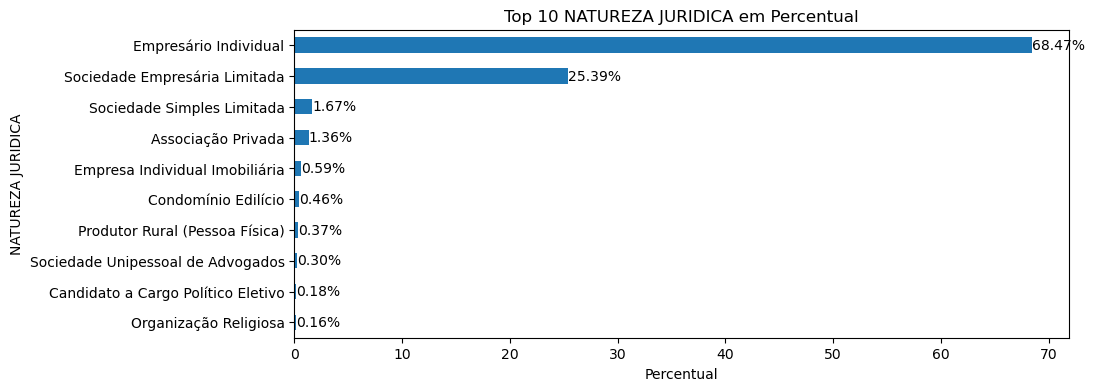

In [18]:
plt.figure(figsize=(10, 4))
percentuais.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Percentual')
plt.ylabel('NATUREZA JURIDICA')
plt.title('Top 10 NATUREZA JURIDICA em Percentual')
for index, value in enumerate(percentuais.sort_values(ascending=True)):
    plt.text(value, index, f'{value:.2f}%', va='center')
plt.show()

In [20]:
#Análise da qualificação do sócio
agrupado = df.groupby(['QUALIFICACAO_DO_RESPONSAVEL']).size()
agrupado_ordenado = agrupado.sort_values(ascending=False)
mais_frequentes = agrupado_ordenado.head(10)
print(mais_frequentes)

QUALIFICACAO_DO_RESPONSAVEL
50    11249207
49     4241238
16      288175
28      144607
5       127565
34       97453
19       70406
59       61330
65       58209
51       29796
dtype: int64


In [21]:
#Analisar capital social da empresa
df['CAPITAL_SOCIAL_DA_EMPRESA'].describe()

count     16435968
unique       79177
top           0,00
freq       4598744
Name: CAPITAL_SOCIAL_DA_EMPRESA, dtype: object

In [22]:
type('CAPITAL_SOCIAL_DA_EMPRESA')

str

In [ ]:
df['CAPITAL_SOCIAL_DA_EMPRESA'] = df['CAPITAL_SOCIAL_DA_EMPRESA'].str.replace(',', '.').astype(float)

In [27]:
df['CAPITAL_SOCIAL_DA_EMPRESA'].describe()

count    1.643597e+07
mean     9.106708e+06
std      2.938240e+09
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+03
75%      8.000000e+03
max      1.000000e+12
Name: CAPITAL_SOCIAL_DA_EMPRESA, dtype: float64

Text(0.5, 1.0, 'CAPITAL_SOCIAL_DA_EMPRESA')

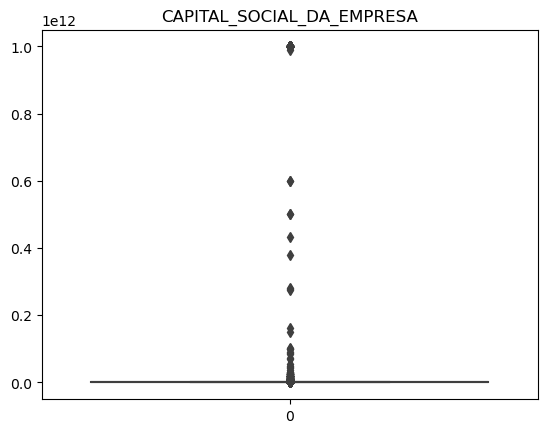

In [28]:
#Observar a quantidade de Outliers com boxplot
srn.boxplot(df['CAPITAL_SOCIAL_DA_EMPRESA']).set_title('CAPITAL_SOCIAL_DA_EMPRESA')

In [29]:
agrupado = df.groupby(['CAPITAL_SOCIAL_DA_EMPRESA']).size()
agrupado

CAPITAL_SOCIAL_DA_EMPRESA
0.000000e+00    4598744
1.000000e-02        144
2.000000e-02        579
3.000000e-02         79
4.000000e-02         65
                 ...   
9.900000e+11          1
9.990000e+11         10
9.999990e+11          4
1.000000e+12          1
1.000000e+12        124
Length: 79177, dtype: int64

In [30]:
agrupado_ordenado = agrupado.sort_values(ascending = True)

In [31]:
top_10 = agrupado_ordenado.tail(10)

In [33]:
percentuais = top_10 / top_10.sum() * 100

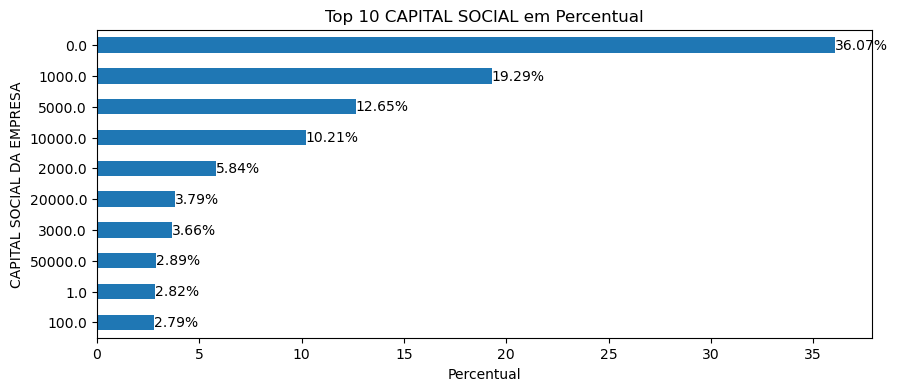

In [37]:
#Gerar gráfico com o percentual de capital social mais frequentes 
#Existem várias empresas na base que não têm capital social por conta do tipo societário
plt.figure(figsize=(10, 4))
percentuais.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Percentual')
plt.ylabel('CAPITAL SOCIAL DA EMPRESA')
plt.title('Top 10 CAPITAL SOCIAL em Percentual')
for index, value in enumerate(percentuais.sort_values(ascending=True)):
    plt.text(value, index, f'{value:.2f}%', va='center')
plt.show()

In [38]:
#Verificar a quantidades de NaN's em 'PORTE DA EMPRESA'
df['PORTE_DA_EMPRESA'].isnull().sum()

12206

In [39]:
#Trocar pelo valo da moda (valor que mais aparece)
moda = sts.mode(df['PORTE_DA_EMPRESA'])
moda

1.0

In [40]:
df['PORTE_DA_EMPRESA'].fillna(1.0, inplace = True)

In [41]:
df['PORTE_DA_EMPRESA'].isnull().sum()

0

In [42]:
agrupado = df.groupby(['PORTE_DA_EMPRESA']).size()
agrupado

PORTE_DA_EMPRESA
1.0    12231421
3.0      451839
5.0     3752708
dtype: int64

In [43]:
percentuais = (agrupado / len(df)) * 100

In [45]:
percentuais_ordenado = percentuais.sort_values(ascending = False)

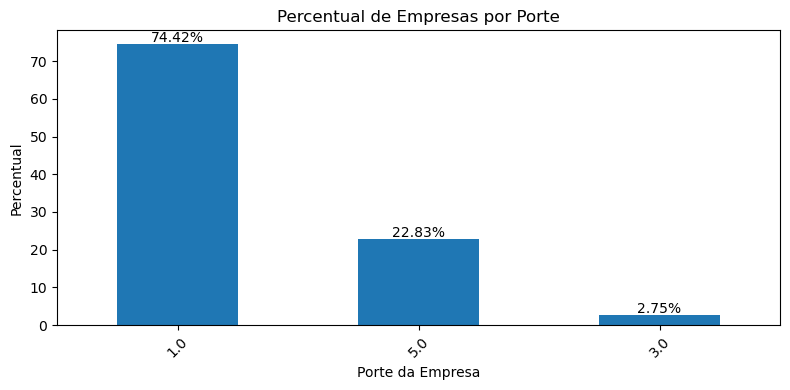

In [50]:
#Gerar gráfico de colunas com o percentual de cada valor do PORTE DA EMPRESA
plt.figure(figsize=(8, 4))
percentuais_ordenado.plot(kind='bar')
plt.xlabel('Porte da Empresa')
plt.ylabel('Percentual')
plt.title('Percentual de Empresas por Porte')
# Adicionar os percentuais acima de cada coluna
for i, v in enumerate(percentuais_ordenado):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
#Analisar a coluna ENTE FEDERATIVO RESPONSAVEL
agrupado = df.groupby(['ENTE_FEDERATIVO_RESPONSAVEL']).size()
agrupado

ENTE_FEDERATIVO_RESPONSAVEL
ABADIA DE GOIAS - GO    3
ABADIANIA - GO          4
ABAETE - MG             2
ABAETETUBA - PA         4
ABAIARA - CE            1
                       ..
XINGUARA - PA           1
XIQUE-XIQUE - BA        2
ZABELE - PB             1
ZACARIAS - SP           2
ZE DOCA - MA            2
Length: 4187, dtype: int64

In [52]:
#Verificar a quantidades de NaN's em 'ENTE FEDERATIVO RESPONSAVEL'
df['ENTE_FEDERATIVO_RESPONSAVEL'].isnull().sum()

16424984

In [53]:
#Preencher esses valores NaN como 'DEMAIS NATUREZAS'
df['ENTE_FEDERATIVO_RESPONSAVEL'].fillna('DEMAIS NATURAZES', inplace = True)

In [54]:
df['ENTE_FEDERATIVO_RESPONSAVEL'].isnull().sum()

0

In [55]:
#Vamos limpar essa coluna separando as cidades das UFs
df['ENTE_FEDERATIVO'] = df.ENTE_FEDERATIVO_RESPONSAVEL.str.split(' - ').str.get(0)
df['UF'] = df.ENTE_FEDERATIVO_RESPONSAVEL.str.split(' - ').str.get(1)

In [56]:
df.head()

,CNPJ_BASICO,RAZAO_SOCIAL/NOME_EMPRESARIAL,NATUREZA_JURIDICA,QUALIFICACAO_DO_RESPONSAVEL,CAPITAL_SOCIAL_DA_EMPRESA,PORTE_DA_EMPRESA,ENTE_FEDERATIVO_RESPONSAVEL,numeros,NOME_EMPRESARIAL,ENTE_FEDERATIVO,UF
0,41273596,RODRIGO JOSE FERREIRA LOPES 05010247941,2135,50,10000.0,1.0,DEMAIS NATURAZES,05010247941,RODRIGO JOSE FERREIRA LOPES,DEMAIS NATURAZES,NaN
1,41273597,PACHARRUS QUEIROZ DA COSTA E SILVA 03618384335,2135,50,5000.0,1.0,DEMAIS NATURAZES,03618384335,PACHARRUS QUEIROZ DA COSTA E SILVA,DEMAIS NATURAZES,NaN
2,41273598,GLORIA VIANA DIAS DA SILVA 13118961716,2135,50,1100.0,1.0,DEMAIS NATURAZES,13118961716,GLORIA VIANA DIAS DA SILVA,DEMAIS NATURAZES,NaN
3,41273599,ANA PAULA DA SILVA DE PAULA 04659802957,2135,50,2000.0,1.0,DEMAIS NATURAZES,04659802957,ANA PAULA DA SILVA DE PAULA,DEMAIS NATURAZES,NaN
4,41273600,41.273.600 AVANILSON BRUNO MATIAS DA SILVA,2135,50,50000.0,1.0,DEMAIS NATURAZES,41.273.600,AVANILSON BRUNO MATIAS DA SILVA,DEMAIS NATURAZES,NaN


In [57]:
agrupado = df.groupby(['UF']).size()
agrupado

UF
AC      43
AL      99
AM     134
AP      25
BA     374
CE     236
ES     206
GO     489
MA     346
MG     919
MS     121
MT     142
PA     187
PB     233
PE     180
PI     283
PR    1400
RJ     185
RN     141
RO     101
RR      16
RS    1299
SC     761
SE      38
SP    2052
TO      79
dtype: int64

In [58]:
agrupado_ordenado = agrupado.sort_values(ascending=False)

In [59]:
top_5_mais_frequentes = agrupado_ordenado.head(5)

In [60]:
print(top_5_mais_frequentes)

UF
SP    2052
PR    1400
RS    1299
MG     919
SC     761
dtype: int64


In [61]:
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib import cm

In [68]:
brasil = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brasil = brasil[brasil['name'] == 'Brazil']

/var/folders/7m/rkm99dj52c34p9h_yp5_xs9c0000gr/T/ipykernel_42992/2350559492.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  brasil = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [62]:
frequencia_uf = df['UF'].value_counts().reset_index()
frequencia_uf.columns = ['UF', 'Frequencia']

In [63]:
uf_shapefile = gpd.read_file('BR_UF_2022.shp') 

In [64]:
print(uf_shapefile.columns)

Index(['CD_UF', 'NM_UF', 'SIGLA_UF', 'NM_REGIAO', 'AREA_KM2', 'geometry'], dtype='object')


In [65]:
mapa_uf = uf_shapefile.merge(frequencia_uf, left_on='SIGLA_UF', right_on='UF')

In [66]:
norm = Normalize(vmin=mapa_uf['Frequencia'].min(), vmax=mapa_uf['Frequencia'].max())
cmap = cm.Blues

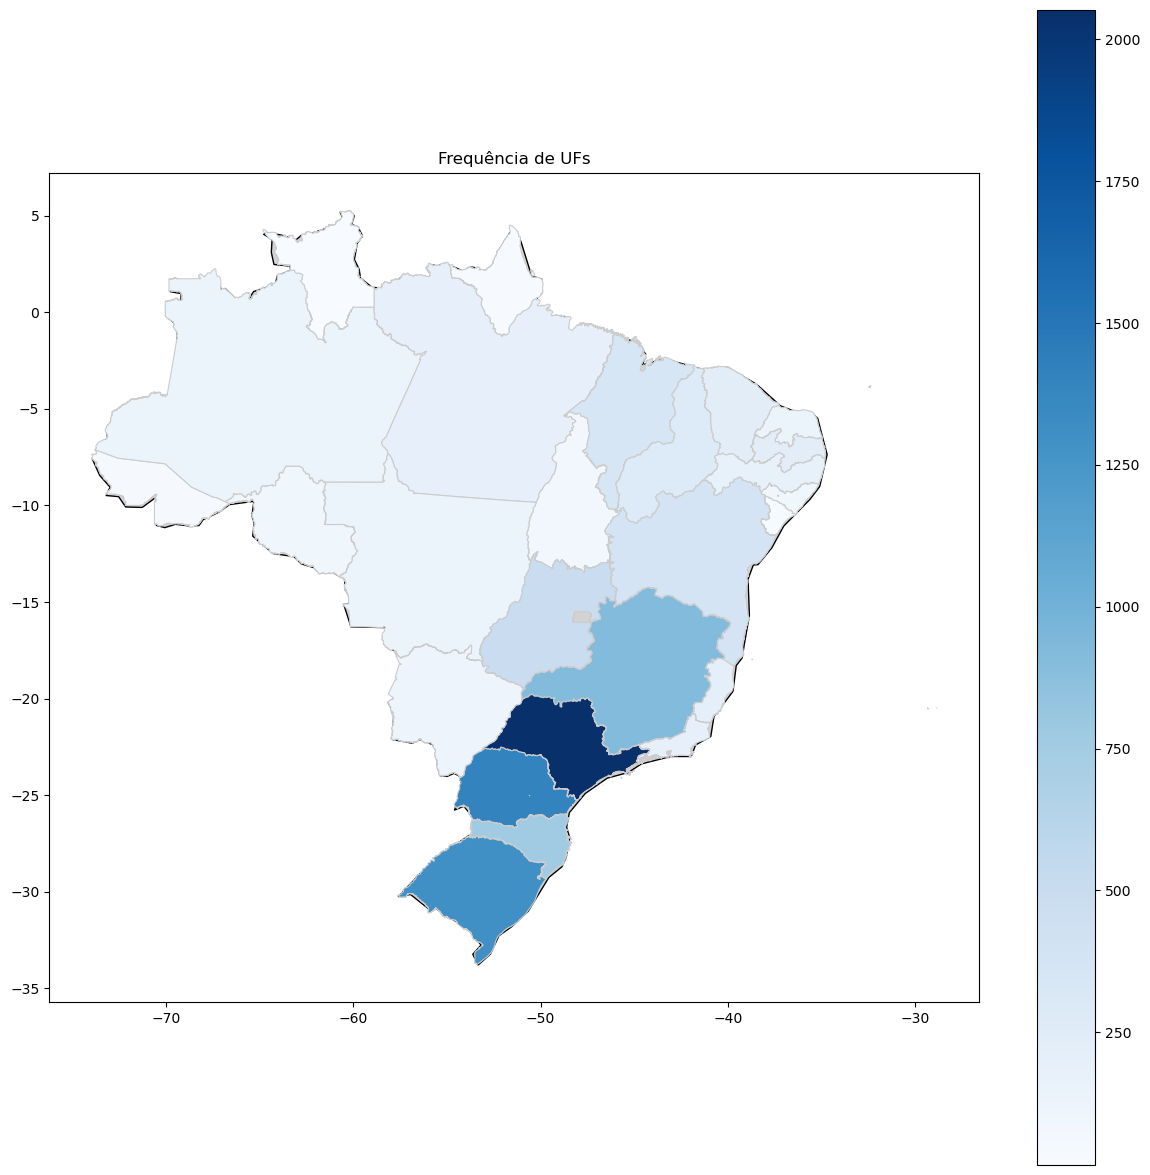

In [69]:
#Mostrar mapa com maiores quantidades de empress em cada UF
fig, ax = plt.subplots(1, figsize=(15, 15))
brasil.plot(ax=ax, color='lightgrey', edgecolor='black')
mapa_uf.plot(column='Frequencia', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, norm=norm)
ax.set_title('Frequência de UFs')
plt.show()